In [1]:
#specifying the folder where images are present

In [2]:
TrainingImagePath = "C:\\Users\\Siddiq\\Desktop\\face\\Train\\Train"

In [3]:
validationImagePath = "C:\\Users\\Siddiq\\Downloads\\validation\\validation"

In [4]:
from keras.preprocessing.image import ImageDataGenerator

In [5]:
#base model

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./225)

In [7]:
test_datagen = ImageDataGenerator(rescale = 1./225)

In [8]:
#Generating the training data

In [9]:
training_set = train_datagen.flow_from_directory(TrainingImagePath,
                                                target_size = (64,64),
                                                batch_size = 20,
                                                class_mode = 'categorical')

Found 200 images belonging to 25 classes.
Found 200 images belonging to 25 classes.


# Validation set

In [10]:
#Generating the validation data

In [11]:
validation_set = test_datagen.flow_from_directory(validationImagePath,
                                                target_size = (64,64),
                                                batch_size = 20,
                                                class_mode = 'categorical')

Found 50 images belonging to 25 classes.
Found 50 images belonging to 25 classes.


In [12]:
# Libraries and model type

In [13]:
# Create CNN Deep learning model

In [14]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [15]:
# Initializing the Convolutional Neural Network

In [16]:
classifier = Sequential()

# MODEL

In [17]:
# STEP 1 Convolution
# Adding th e first layer of CNN
# We are using the format (64,64,3) because we are using Tensorflow backend
# It means 3 matrix of size (64x64) pixels representing Red, Green and Blue components of pixels

In [18]:
classifier.add(Convolution2D(32, kernel_size=(3,3),
                            input_shape=(64,64,3), activation ='relu'))

In [19]:
#STEP 2- Max Pooling

In [20]:
classifier.add(MaxPool2D(pool_size=(2,2)))

In [21]:
# Additional layer of convolution for better accuracy

In [22]:
classifier.add(Convolution2D(64, kernel_size=(3,3), activation='relu'))

In [23]:
classifier.add(MaxPool2D(pool_size=(2,2)))

In [24]:
#STEP 3- Flattening

In [25]:
classifier.add(Flatten())

In [26]:
#STEP 4 - Fully connected neural network

In [27]:
classifier.add(Dense(64, activation='relu'))

In [28]:
classifier.add(Dense(25, activation='softmax'))

In [29]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Model: "sequential"
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                  

# Compiler

In [30]:
# Compiling the CNN

In [31]:
classifier.compile(loss='categorical_crossentropy',
                  optimizer = 'adam', metrics =['accuracy'])

# Execution of model

In [32]:
# Starting the model training

In [33]:
history = classifier.fit_generator(training_set, epochs =20,
                                  validation_data=validation_set)

C:\Users\Siddiq\AppData\Local\Temp\ipykernel_8532\2354014473.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(training_set, epochs =20,
C:\Users\Siddiq\AppData\Local\Temp\ipykernel_8532\2354014473.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(training_set, epochs =20,


Epoch 1/20
Epoch 1/20
10/10 [==============================] - 16s 1s/step - loss: 3.2721 - accuracy: 0.0550 - val_loss: 3.1181 - val_accuracy: 0.0600
Epoch 2/20
Epoch 2/20
10/10 [==============================] - 12s 1s/step - loss: 3.0268 - accuracy: 0.1000 - val_loss: 2.9200 - val_accuracy: 0.2000
Epoch 3/20
Epoch 3/20
10/10 [==============================] - 11s 1s/step - loss: 2.7253 - accuracy: 0.3350 - val_loss: 2.5484 - val_accuracy: 0.3600
Epoch 4/20
Epoch 4/20
10/10 [==============================] - 12s 1s/step - loss: 2.1809 - accuracy: 0.4500 - val_loss: 2.1011 - val_accuracy: 0.4800
Epoch 5/20
Epoch 5/20
10/10 [==============================] - 10s 1s/step - loss: 1.5283 - accuracy: 0.6650 - val_loss: 1.6670 - val_accuracy: 0.6000
Epoch 6/20
Epoch 6/20
10/10 [==============================] - 10s 1s/step - loss: 0.9515 - accuracy: 0.7750 - val_loss: 1.3422 - val_accuracy: 0.7000
Epoch 7/20
Epoch 7/20
10/10 [==============================] - 10s 1s/step - loss: 0.4387 - ac

# Accuracy base model

In [34]:
#Displaying curves of loss and accuracy during training

In [35]:
import matplotlib.pyplot as plt

In [36]:
acc = history.history['accuracy']

In [37]:
val_acc = history.history['val_accuracy']

In [38]:
loss = history.history['loss']

In [39]:
val_loss = history.history['val_loss']

In [40]:
epochs = range(1, len(acc) + 1)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

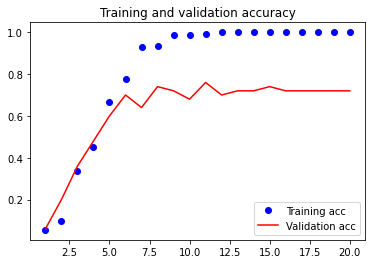

<Figure size 432x288 with 0 Axes>

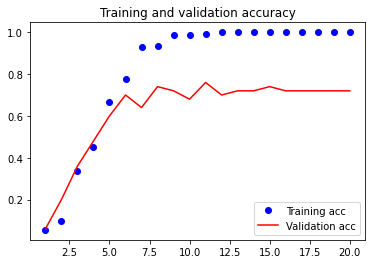

<Figure size 432x288 with 0 Axes>

In [41]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

# Loss base model

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

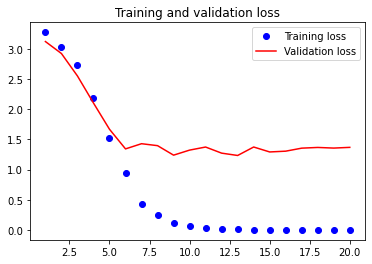

<Figure size 432x288 with 0 Axes>

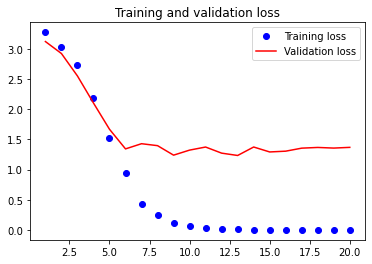

<Figure size 432x288 with 0 Axes>

In [42]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

In [43]:
# Lets improve

In [44]:
# Model 2

In [45]:
# Adding parameters in the ImageDatagenerator

In [46]:
train_datagen = ImageDataGenerator(rescale=1./225, shear_range=0.5,
                                  zoom_range=0.5, width_shift_range=0.2,
                                  height_shift_range=0.2)

In [47]:
# No transformations are done on the testing images

In [48]:
test_datgen = ImageDataGenerator(rescale=1./225)

In [49]:
# Generating the training data

In [50]:
training_set = train_datagen.flow_from_directory(TrainingImagePath,
                                                target_size=(64,64),
                                                batch_size=20,
                                                class_mode='categorical')

Found 200 images belonging to 25 classes.
Found 200 images belonging to 25 classes.


In [51]:
# Generating the validation data

In [52]:
validation_set = test_datagen.flow_from_directory(validationImagePath,
                                                target_size=(64,64),
                                                batch_size=20,
                                                class_mode='categorical')

Found 50 images belonging to 25 classes.
Found 50 images belonging to 25 classes.


In [53]:
#Create Cnn deep learning model

In [54]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [55]:
# Initializing the Convolutional Neural Network

In [56]:
classifier = Sequential()

In [57]:
# Convolution

In [58]:
classifier.add(Convolution2D(32, kernel_size=(3,3),
                            input_shape=(64,64,3), activation ='relu'))

In [59]:
#Max Pooling

In [60]:
classifier.add(MaxPool2D(pool_size=(2,2)))

In [61]:
# Additional layer of convolution for better accuracy

In [62]:
classifier.add(Convolution2D(64, kernel_size=(3,3), activation='relu'))

In [63]:
classifier.add(MaxPool2D(pool_size=(2,2)))

In [64]:
#Flattening

In [65]:
classifier.add(Flatten())

In [66]:
#Fully connected neural network

In [67]:
classifier.add(Dense(64, activation='relu'))#hidden layer

In [68]:
classifier.add(Dense(25, activation='softmax'))#output layer

In [69]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Model: "sequential_1"
 Layer (type)                Output Shape              Param #   
_________________________________________________________________
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
 2D)                                                             
                                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        18496     
                                

In [70]:
#Compiler

In [71]:
classifier.compile(loss='categorical_crossentropy',
                  optimizer='adam', metrics=['accuracy'])

In [72]:
#Execute

In [73]:
#Starting the model training

In [74]:
history = classifier.fit_generator(training_set, epochs =100,
                                  validation_data=validation_set)

C:\Users\Siddiq\AppData\Local\Temp\ipykernel_8532\346272482.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(training_set, epochs =100,
C:\Users\Siddiq\AppData\Local\Temp\ipykernel_8532\346272482.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(training_set, epochs =100,


Epoch 1/100
Epoch 1/100
10/10 [==============================] - 14s 1s/step - loss: 3.4220 - accuracy: 0.0200 - val_loss: 3.2113 - val_accuracy: 0.0400
Epoch 2/100
Epoch 2/100
10/10 [==============================] - 11s 1s/step - loss: 3.2077 - accuracy: 0.0600 - val_loss: 3.1740 - val_accuracy: 0.0400
Epoch 3/100
Epoch 3/100
10/10 [==============================] - 11s 1s/step - loss: 3.1674 - accuracy: 0.0950 - val_loss: 3.0863 - val_accuracy: 0.0800
Epoch 4/100
Epoch 4/100
10/10 [==============================] - 12s 1s/step - loss: 3.0875 - accuracy: 0.0800 - val_loss: 2.9506 - val_accuracy: 0.0800
Epoch 5/100
Epoch 5/100
10/10 [==============================] - 11s 1s/step - loss: 3.0438 - accuracy: 0.1000 - val_loss: 2.8442 - val_accuracy: 0.1800
Epoch 6/100
Epoch 6/100
10/10 [==============================] - 10s 1s/step - loss: 2.9719 - accuracy: 0.1050 - val_loss: 2.8424 - val_accuracy: 0.2000
Epoch 7/100
Epoch 7/100
10/10 [==============================] - 10s 1s/step - los

In [75]:
#Displaying curves of loss and accuracy during training

In [76]:
import matplotlib.pyplot as plt

In [77]:
acc = history.history['accuracy']

In [78]:
val_acc = history.history['val_accuracy']

In [79]:
loss = history.history['loss']

In [80]:
val_loss = history.history['val_loss']

In [81]:
epochs = range(1, len(acc) + 1)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

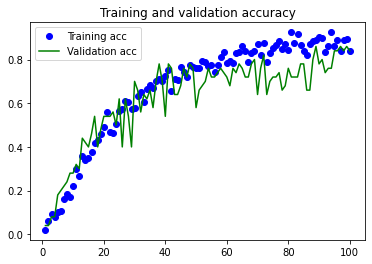

<Figure size 432x288 with 0 Axes>

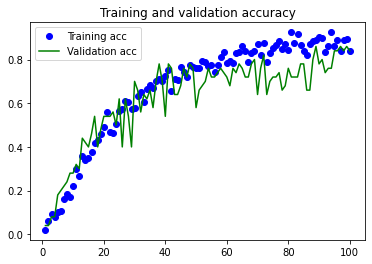

<Figure size 432x288 with 0 Axes>

In [82]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

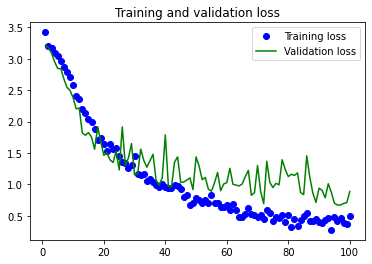

<Figure size 432x288 with 0 Axes>

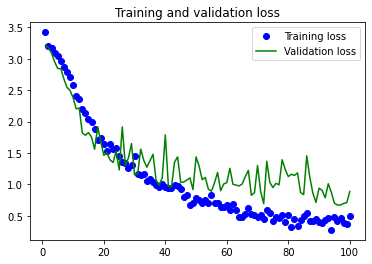

<Figure size 432x288 with 0 Axes>

In [83]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()